In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop('Outcome', axis = 1)

In [5]:
y = df['Outcome']

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
scaler = StandardScaler()

In [11]:
scaler_X = scaler.fit_transform(X)

In [13]:
scaled_X = pd.DataFrame(scaler_X, columns = X.columns)

In [80]:
scaled_X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


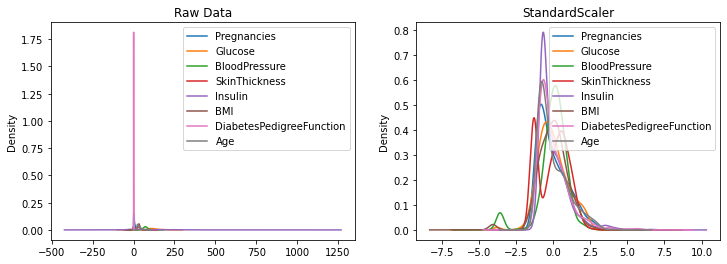

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
X.plot(kind='kde',title='Raw Data', ax= ax[0])
scaled_X.plot(kind='kde',title='StandardScaler', ax= ax[1])
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=0.25, random_state=0)

In [37]:
X_train.shape

(576, 8)

In [38]:
X_test.shape

(192, 8)

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류기를 불러옴
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [40]:
Classifier = DecisionTreeClassifier()

In [41]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = Classifier.predict(X_test)

In [43]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [45]:
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)

In [52]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 68.91 %
Standard Deviation : 4.51 %


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
Classifier = RandomForestClassifier(n_estimators= 100)

In [61]:
Classifier.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred = Classifier.predict(X_test)

In [63]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [64]:
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)

In [65]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.13 %
Standard Deviation : 6.06 %


# 가우시안 나이브 베이즈

In [66]:
from sklearn.naive_bayes import GaussianNB
Classifier = GaussianNB()
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.67 %
Standard Deviation : 5.15 %


# K-NN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier()
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 72.06 %
Standard Deviation : 4.70 %


# AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
Classifier = AdaBoostClassifier()
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.15 %
Standard Deviation : 4.18 %


# 이차 판별 분석

In [69]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Classifier = QuadraticDiscriminantAnalysis()
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.30 %
Standard Deviation : 6.13 %


# SVM

In [70]:
from sklearn.svm import SVC
Classifier = SVC(kernel='linear')
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.68 %
Standard Deviation : 7.93 %


# SVM -RBF

In [73]:
from sklearn.svm import SVC
Classifier = SVC(kernel='rbf')
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.99 %
Standard Deviation : 6.17 %


# Votting

In [76]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel= 'linear')
Classifier = VotingClassifier(estimators=[('lr',clf1),('rf',clf2),('gnb',clf3)])
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.62 %
Standard Deviation : 3.28 %


# Bagging

In [77]:
from sklearn.ensemble import BaggingClassifier
Classifier = BaggingClassifier()
Classifier.fit(X_train,y_train)
y_pred = Classifier.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=Classifier, X= X_train, y = y_tain, cv = skf)
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.09 %
Standard Deviation : 5.41 %


# 여러 알고리즘 성능을 한눈에 비교하기

Mean accuracy of D_tree : 68.91 %
Mean accuracy of RF : 75.33 %
Mean accuracy of GNB : 75.02 %
Mean accuracy of KNN : 73.25 %
Mean accuracy of Ada : 75.52 %
Mean accuracy of QDA : 75.53 %
Mean accuracy of SVM_l : 75.38 %
Mean accuracy of SVM_k : 73.45 %
Mean accuracy of Voting : 74.30 %
Mean accuracy of Bagging : 75.85 %


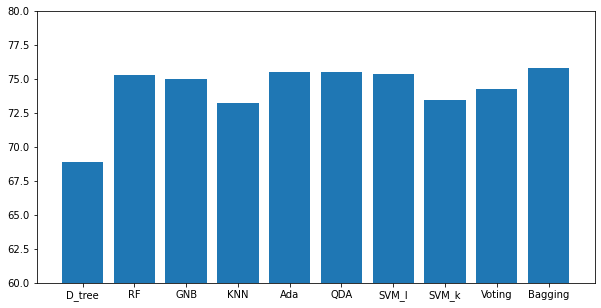

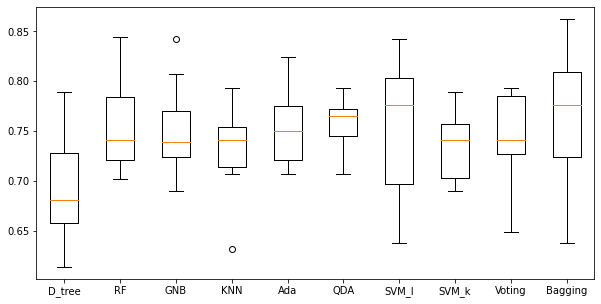

In [78]:
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = X_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()